In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

from sklearn.externals import joblib
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer
from sklearn.utils import shuffle

from tools import plot_confusion_matrix

In [2]:
df = pd.read_csv('../data/datatran_2016-2017.csv', dtype={'br_str': str})
df.shape

/Users/leportella/.virtualenvs/udacity/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(180991, 32)

In [3]:
dd = df[['weekday', 'uf', 'br_str', 'km_int', 'accident_cause_simplified', 'accident_type', 
        'moment_of_day', 'climate', 'road_layout', 'feridos']]
dd = dd.dropna()

In [4]:
X = pd.get_dummies(dd.drop(['feridos'], axis=1))
y = dd['feridos']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
y_pred = model.predict(X_test)

In [9]:
baseline = np.linspace(int(round(y_test.mean())), int(round(y_test.mean())), len(y_test))

In [10]:
y_pred_int = pd.Series(y_pred).apply(lambda x: int(round(x)))

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

print('Model Mean Absolute Error: ', mean_absolute_error(y_pred_int, y_test))
print('Baseline Mean Absolute Error: ', mean_absolute_error(baseline, y_test))
print('Accuracy Score: ', accuracy_score(y_pred_int, y_test))

Model Mean Absolute Error:  0.7663747617337495
Baseline Mean Absolute Error:  0.7095776126412332
Accuracy Score:  0.4387414016961795


(0, 10)

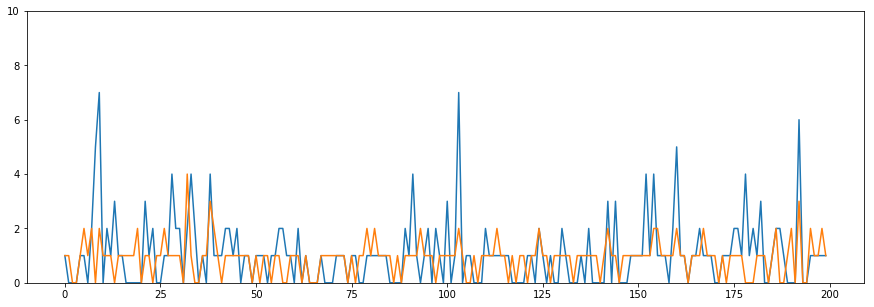

In [12]:
plt.figure(figsize=(15,5))
num=700
plt.plot(np.arange(200),y_test[num-200:num])
plt.plot(np.arange(200), y_pred_int[num-200:num])
plt.ylim(0,10)